In [41]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,FastICA
import seaborn as sns
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap

## Load data

In [12]:
control_4d_1w_2w = "Tran_RGC_scRNA/npys/stacked/control_4d_1w_2w.npy"
load_control_4d_1w_2w = np.load(control_4d_1w_2w, allow_pickle=True)

## PCA

In [16]:
classes_names, labels_categorical = np.unique(load_control_4d_1w_2w[1:,-1], return_inverse=True)
classes_names

array(['1w_after_crush', '2w_after_crush', '4d_after_crush', 'control'],
      dtype=object)

In [25]:
pca_control_1week_2weeks = np.load("pca_transform_4d_1weeek_2weeks.npy")

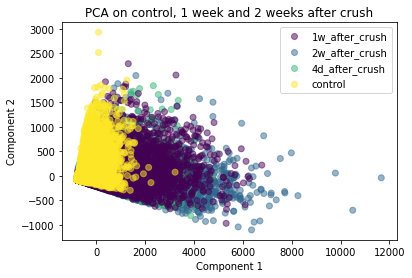

In [50]:
scatter = plt.scatter(pca_control_1week_2weeks[:, 0], pca_control_1week_2weeks[:, 1], alpha=0.5, c=labels_categorical)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("PCA on control, 1 week and 2 weeks after crush")
plt.legend(handles=scatter.legend_elements()[0],labels=list(classes_names))
plt.show()

## kmeans

In [13]:
%%time
t_kmeans = KMeans(n_clusters=2, random_state=149).fit_transform(load_control_4d_1w_2w[1:,:-1])

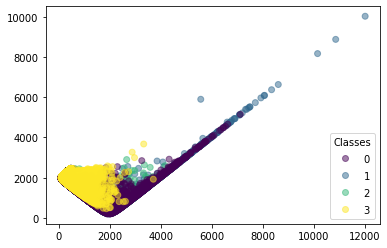

In [24]:
fig, ax = plt.subplots()
scatter = ax.scatter(t_kmeans[:, 0], t_kmeans[:, 1], alpha=0.5, c=labels_categorical)
plt.legend(*scatter.legend_elements(),loc="lower right", title="Classes")
plt.show()